<a href="https://colab.research.google.com/github/JainAnki/ADSMI-Notebooks/blob/main/Community_detection_PPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Data Science and Machine Intelligence
## A program by IIT Madras and TalentSprint
### Mini Project: Community Detection in protein-protein interaction network

## Description

Inferring significant communities of interacting proteins is a main trend of current biological research, as this task can help in revealing the functionality and the relevance of specific macromolecular assemblies or even in discovering possible proteins networks may support drug discovery and diseases treatment even in earlier stages. 

## Learning Objectives

At the end of the mini project, you will be able to understand-
 
* Community Detection

in protein networks.



**Packages used:**  

* `networkx` for graph analysis
* `requests` for fetching data over the internet  
* `Pandas` for data frames and easy to read csv files  
* `Numpy` for array and matrix mathematics functions  
* `Matplotlib` for visualization

### Importing the packages

In [ ]:
#import libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter
from networkx.algorithms.community import k_clique_communities
from operator import itemgetter

from networkx.algorithms import node_classification
from networkx.algorithms import community
from networkx.algorithms.community import naive_greedy_modularity_communities

In [ ]:
from google.colab import files
  
  
uploaded = files.upload()

Saving DM-LC.txt to DM-LC.txt


In [ ]:
#load file (DM-LC)
df = pd.read_csv('DM-LC.txt',  sep= '\s+', header = None)
#df = pd.read_table('DM-LC.txt', header= None)
df.head()

,0,1,2
0,B0024.14,F38E9.2,3.4297
1,B0025.2,F11C1.6,3.4297
2,B0025.2,F55D12.4,3.4297
3,B0025.2,F57B9.10,3.4297
4,B0035.10,B0207.4,3.4297


## Protein protein interaction(PPI)

PPI networks are the networks of protein complexes formed by biochemical events or electrostatic forces serving a biological function. Since the analysis of the protein networks is now growing, we have more information regarding protein, genomes and their influence on life. Today, PPI networks are used to study diseases, improve drugs and understand other processes in medicine and health that will eventually help mankind.

Proteins are linear chain biomolecules that are the basis of functional networks in all organisms. Protein Interactions can be very helpful in shedding light on different types of proteins and how they function. For instance, most cancers are caused by increasing interaction edge weights of oncogenes and decreasing interaction edge weights of tumor suppressor genes. Here the protein protein interaction in fly(Drosophila melanogaster) has been carried out and the dataset DM-LC.txt has been used to perform the comunity detection on PPI. 

The fruit fly, Drosophila melanogaster, is used as a model organism to study disciplines ranging from fundamental genetics to the development of tissues and organs. Drosophila genome is 60% homologous to that of humans, less redundant, and about 75% of the genes responsible for human diseases have homologs in flies.These features, together with a brief generation time, low maintenance costs, and the availability of powerful genetic tools, allow the fruit fly to be eligible to study complex pathways relevant in biomedical research, including cancer.


Please open the link for more information on the dataset. https://www.inetbio.org/wormnet/downloadnetwork.php



In [ ]:
#Q1. Create network (g) with Networkx
g = nx.Graph()
for i in range(len(df)):
    node=df.loc[i,:][0] # first column as node
    next_node=df.loc[i,:][1]# Second column as  node
    weight=df.loc[i,:][2] # third column as edge cost/weight
    g.add_weighted_edges_from([(node,next_node,weight)])
    print(node,next_node,weight) 
    



B0024.14 F38E9.2 3.4297
B0025.2 F11C1.6 3.4297
B0025.2 F55D12.4 3.4297
B0025.2 F57B9.10 3.4297
B0035.10 B0207.4 3.4297
B0035.10 C09G4.5 3.4297
B0035.10 K01G5.2 3.4297
B0035.10 K07C11.2 3.4297
B0035.10 K08H2.6 3.4297
B0035.10 R06A4.7 3.4297
B0035.10 T05G5.3 3.4297
B0035.10 W02D3.9 3.4297
B0035.10 Y113G7B.17 3.4297
B0035.10 ZK1236.2 3.4297
B0035.7 D2096.8 3.4297
B0035.7 F54C8.2 3.4297
B0035.7 F58A4.3 3.4297
B0035.7 K07A1.12 3.4297
B0035.8 D2096.8 3.4297
B0035.8 F54C8.2 3.4297
B0035.8 F58A4.3 3.4297
B0035.8 W04A8.7 3.4297
B0035.8 Y71F9AL.18 3.4297
B0035.9 C34B7.4 3.4297
B0035.9 F54C8.2 3.4297
B0035.9 F58A4.3 3.4297
B0035.9 K07A1.12 3.4297
B0035.9 Y113G7B.17 3.4297
B0035.9 Y71F9AL.18 3.4297
B0041.7 K01G5.2 3.4297
B0041.7 K08H2.6 3.4297
B0205.3 F40G9.3 3.4297
B0205.7 C33A11.1 3.4297
B0205.7 D2096.8 3.4297
B0205.7 K01G5.2 3.4297
B0205.7 K08H2.6 3.4297
B0205.7 K12D12.1 3.4297
B0205.7 T01G9.6 3.4297
B0205.7 T22B7.1 3.4297
B0205.7 ZK546.14 3.4297
B0207.4 F07B7.5 3.4297
B0207.4 F08G2.3 3.4297
B0

(-1.1746332103013992,
 1.2066393548250198,
 -1.1899918606877329,
 1.1669251611828806)

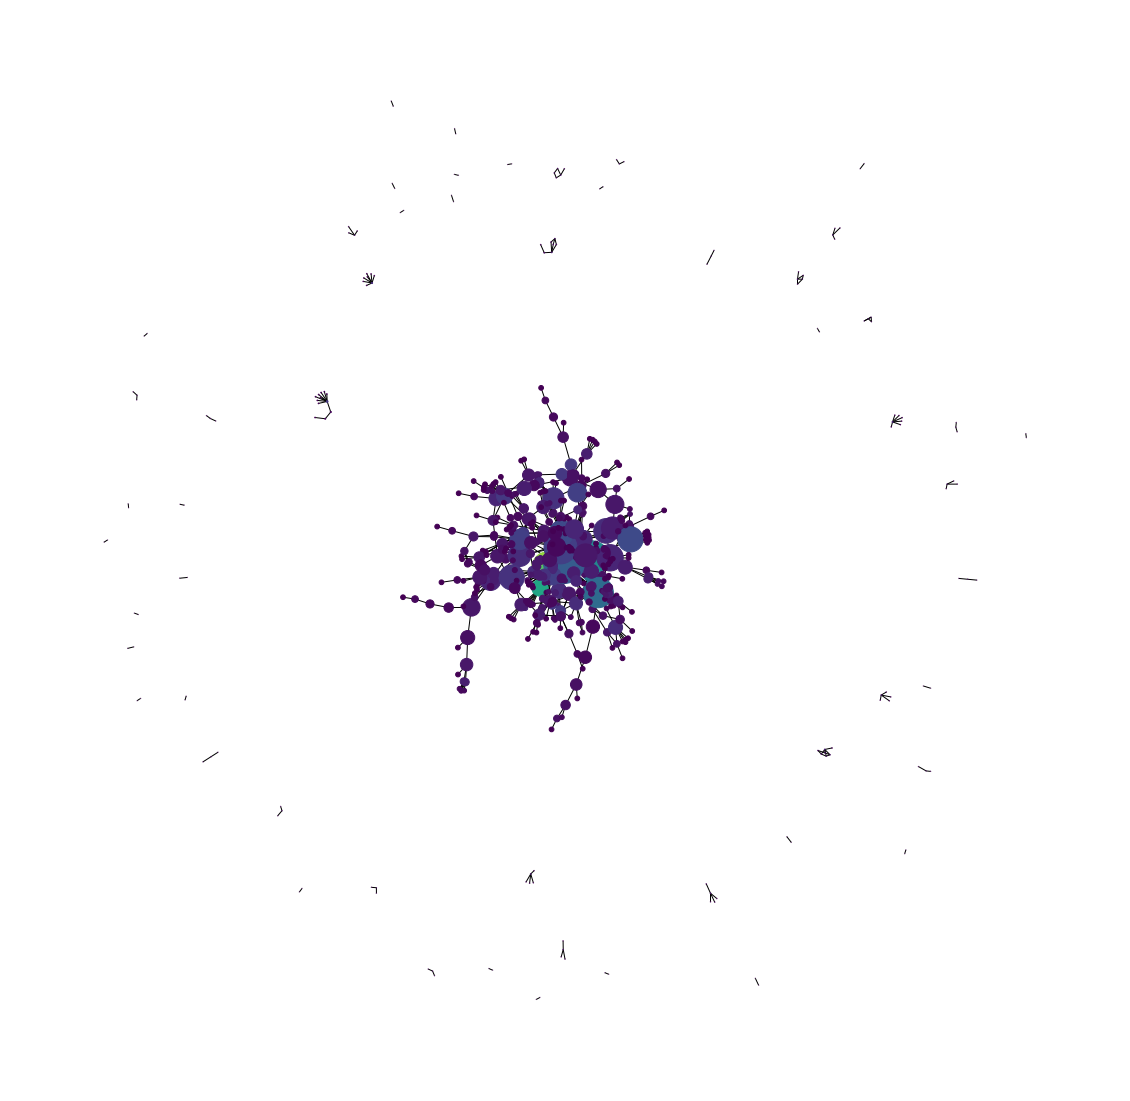

In [ ]:
#position nodes 
pos = nx.spring_layout(g)

#calculate betweeness centrality 
betCent = nx.betweenness_centrality(g, normalized=True, endpoints=True)

#node color varies with Degree
node_color = [20000.0 * g.degree(v) for v in g] 

# node size varies with betweeness centrality
node_size =  [v * 10000 for v in betCent.values()]

#create figure
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')

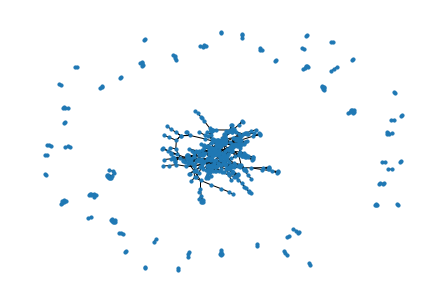

In [ ]:
#another way to draw graph
G = nx.read_weighted_edgelist('DM-LC.txt')
nx.draw(G,  node_size=10)

In [ ]:
#Q2. Compute number of nodes, number of edges and the average degree of the network
network_info = nx.info(g)
print(network_info)
#another solution
print('No. of nodes: ', nx.number_of_nodes(g))
print('No. of edeges: ', nx.number_of_edges(g))


degrees = [deg for (node, deg) in nx.degree(g)]  # The degrees of each node
avg_degree = sum(degrees) / float(len(degrees))
print('Average degree: ', avg_degree )
print("Average degree: ", 2 * nx.number_of_edges(g) / nx.number_of_nodes(g))

Graph with 658 nodes and 1129 edges
No. of nodes:  658
No. of edeges:  1129
Average degree:  3.43161094224924
Average degree:  3.43161094224924


Graph with 658 nodes and 603 edges


(-1.1534395742416383,
 1.2028066444396974,
 -1.1372012162208556,
 1.203082468509674)

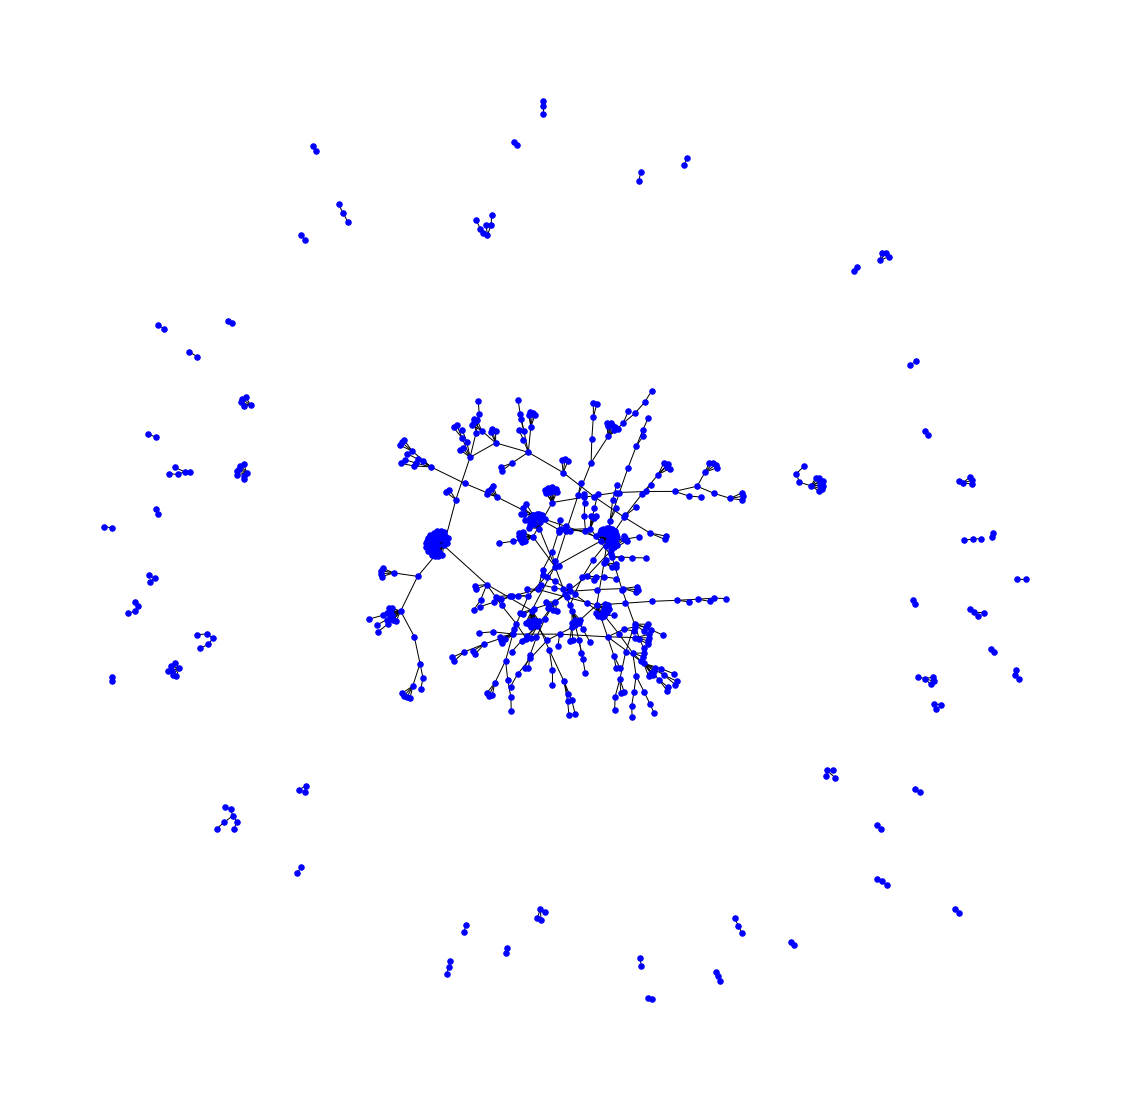

In [ ]:
#Q4. calcualte the minimum spanning tree in g and draw it.
T = nx.minimum_spanning_tree(g)
print(nx.info(T))
#list(T.edges(data=False))
pos = nx.spring_layout(T)
plt.figure(figsize=(20,20))
nx.draw_networkx(T, pos=pos, with_labels=False,
                 node_color='b',
                 node_size= 30 )
plt.axis('off')



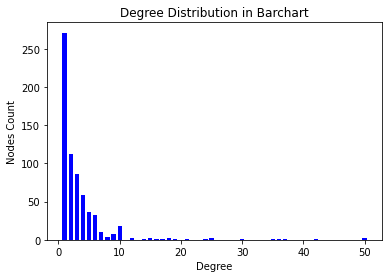

In [ ]:
#Q5. Draw the degree distribution histogram.

#take degrees from network(g)
degree_sequence = sorted([d for n, d in g.degree()], reverse=True)
#print(degree_sequence)

#count  degree frequency
degreeCount = Counter(degree_sequence)
#print(degreeCount)

#separate degree for x-axis and its counts for y-axis
deg, cnt = zip(*degreeCount.items())
#print(deg,cnt)


#create figure
fig, ax = plt.subplots()
#ax.plot(deg, cnt, 'ro-')
ax.bar(deg, cnt, width=0.70, color='b') #creates bar chart graph of degree showing no. of nodes
plt.title("Degree Distribution in Barchart")
plt.xlabel("Degree")
plt.ylabel("Nodes Count")
plt.show()





## Comunity Detection
The ability to identify and characterize not only the protein-protein interactions but also their internal modular organization through network analysis. For this procedure there are many methods are available, Here we are considering Girvan-Newman algorithm for the detection and analysis of community structure.

### Girvan and Newman

The Girvan-Newman algorithm for the detection and analysis of community structure relies on the iterative elimination of edges that have the highest number of shortest paths between nodes passing through them. By removing edges from the graph one-by-one, the network breaks down into smaller pieces, so-called communities. The algorithm was introduced by Michelle Girvan and Mark Newman.

The method is divisive method where edge weight is the number of shortest paths passing through the edge. That value is called edge betweenness and it is a generalization of central vertex betweenness which determines vertex
influence on other vertices in network. Vertex betweennes is the number of shortest paths passing through the vertex, therefore, edge betweenness is the number of shortest paths passing through the endpoints of the edge.

#### Algorithm
The algorithm as follows.\
1. Calculate edge betweenness for every edge in the graph.
2. Remove the edge with highest edge betweenness.
3. Calculate edge betweenness for remaining edges.
4. Repeat steps 2-3 until all edges are removed.



In [ ]:
#Q6 Perform community detection using Girvan-Newman algorithm. (1 MARK)
communities_generator = community.girvan_newman(g)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)
sorted(map(sorted, next_level_communities))

[['B0024.14',
  'B0025.2',
  'B0261.2',
  'B0272.1',
  'B0336.6',
  'B0432.5',
  'B0478.1',
  'C01B7.4',
  'C01C7.1',
  'C01G10.11',
  'C01G8.5',
  'C02F4.1',
  'C04A2.3',
  'C05B10.1',
  'C05D2.1',
  'C06E1.3',
  'C06G4.2',
  'C08F8.8',
  'C08H9.5',
  'C09B8.7',
  'C09D8.1',
  'C09G12.8',
  'C09H6.2',
  'C10E2.3',
  'C10G6.1',
  'C10H11.9',
  'C12D8.10',
  'C14F5.5',
  'C18C4.10',
  'C24A1.2',
  'C24A8.4',
  'C25A1.11',
  'C26G2.1',
  'C28G1.3',
  'C32D5.2',
  'C35B8.2',
  'C41G7.2',
  'C42D8.8',
  'C43G2.2',
  'C44B11.3',
  'C45B11.1',
  'C48D1.2',
  'C50B8.2',
  'C52A11.4',
  'D2045.6',
  'DY3.2',
  'F08F1.8',
  'F09E5.1',
  'F09E5.15',
  'F11C1.6',
  'F11C7.4',
  'F13B9.5',
  'F13E6.6',
  'F14H12.4',
  'F18G5.3',
  'F21H12.4',
  'F22B7.5',
  'F25B4.2',
  'F26B1.7',
  'F28H6.1',
  'F29G9.4',
  'F32G8.6',
  'F35G12.3',
  'F38A6.3',
  'F38E9.2',
  'F38E9.5',
  'F39B1.1',
  'F39G3.8',
  'F39H12.4',
  'F40E10.4',
  'F41G4.2',
  'F42G10.2',
  'F42G4.3',
  'F43C1.2',
  'F44G4.8',
  'F45E1

(-1.1892156648635865,
 1.1485558795928956,
 -1.2091791304945947,
 1.2013613256812097)

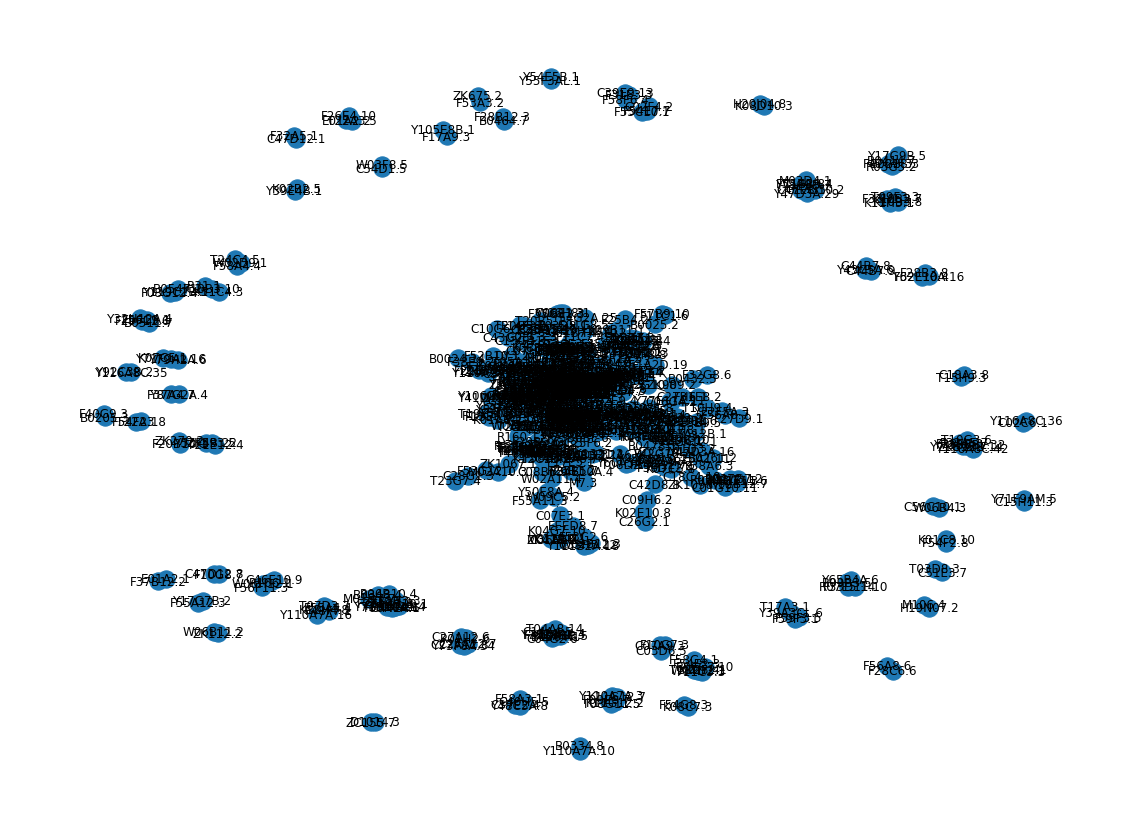

In [ ]:
plt.figure(figsize=(20,15))
nx.draw_networkx(g, with_labels=True)
plt.axis('off')


In [ ]:
# Q7 Print the number of community detected.(1 MARK)
from numpy.ma.core import size

node_groups = []
for com in next(communities_generator):
  node_groups.append(list(com))

print(node_groups)
print('number of comunity detected:', size(node_groups))

[['T04C12.6', 'Y50D4C.1', 'K06A4.3', 'Y39G8B.5', 'T19E10.1', 'T23G7.4', 'F41G4.2', 'C05D2.1', 'F54A5.3', 'R107.4', 'D2045.6', 'T20F10.1', 'M7.1', 'F09E5.15', 'F59G1.5', 'C10H11.9', 'B0025.2', 'B0024.14', 'F42G4.3', 'F56D1.4', 'F13E6.6', 'M176.7', 'F57B9.10', 'ZK899.8', 'M01B2.1', 'C14F5.5', 'F44G4.8', 'C08H9.5', 'T10H10.3', 'R06C1.3', 'C32D5.2', 'F46A9.4', 'F39B1.1', 'F59F5.6', 'F21H12.4', 'C09B8.7', 'K10B2.1', 'ZK938.5', 'F08F1.8', 'C50B8.2', 'F14H12.4', 'ZK1151.1', 'C08F8.8', 'Y37E11AR.2', 'C02F4.1', 'C09G12.8', 'F40E10.4', 'C45B11.1', 'M02A10.3', 'R09D1.12', 'ZK675.1', 'F55D12.4', 'C35B8.2', 'M79.1', 'Y41D4B.13', 'T17A3.8', 'F53G12.1', 'F39G3.8', 'K08E7.7', 'W04G5.6', 'DY3.2', 'C01C7.1', 'T28F12.3', 'K08B12.5', 'F38E9.5', 'C28G1.3', 'F18G5.3', 'T04C12.5', 'B0336.6', 'M03F4.2', 'F38E9.2', 'ZK287.5', 'ZK470.5', 'F46A9.5', 'Y106G6E.5', 'R144.7', 'ZK377.2', 'K03E6.6', 'F46F2.2', 'C24A8.4', 'C09D8.1', 'C04A2.3', 'Y48E1B.13', 'R11G1.4', 'ZK1067.1', 'F11C1.6', 'T04C12.4', 'F22B7.5', 'R10F2

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:711: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(a, copy=False, subok=subok)


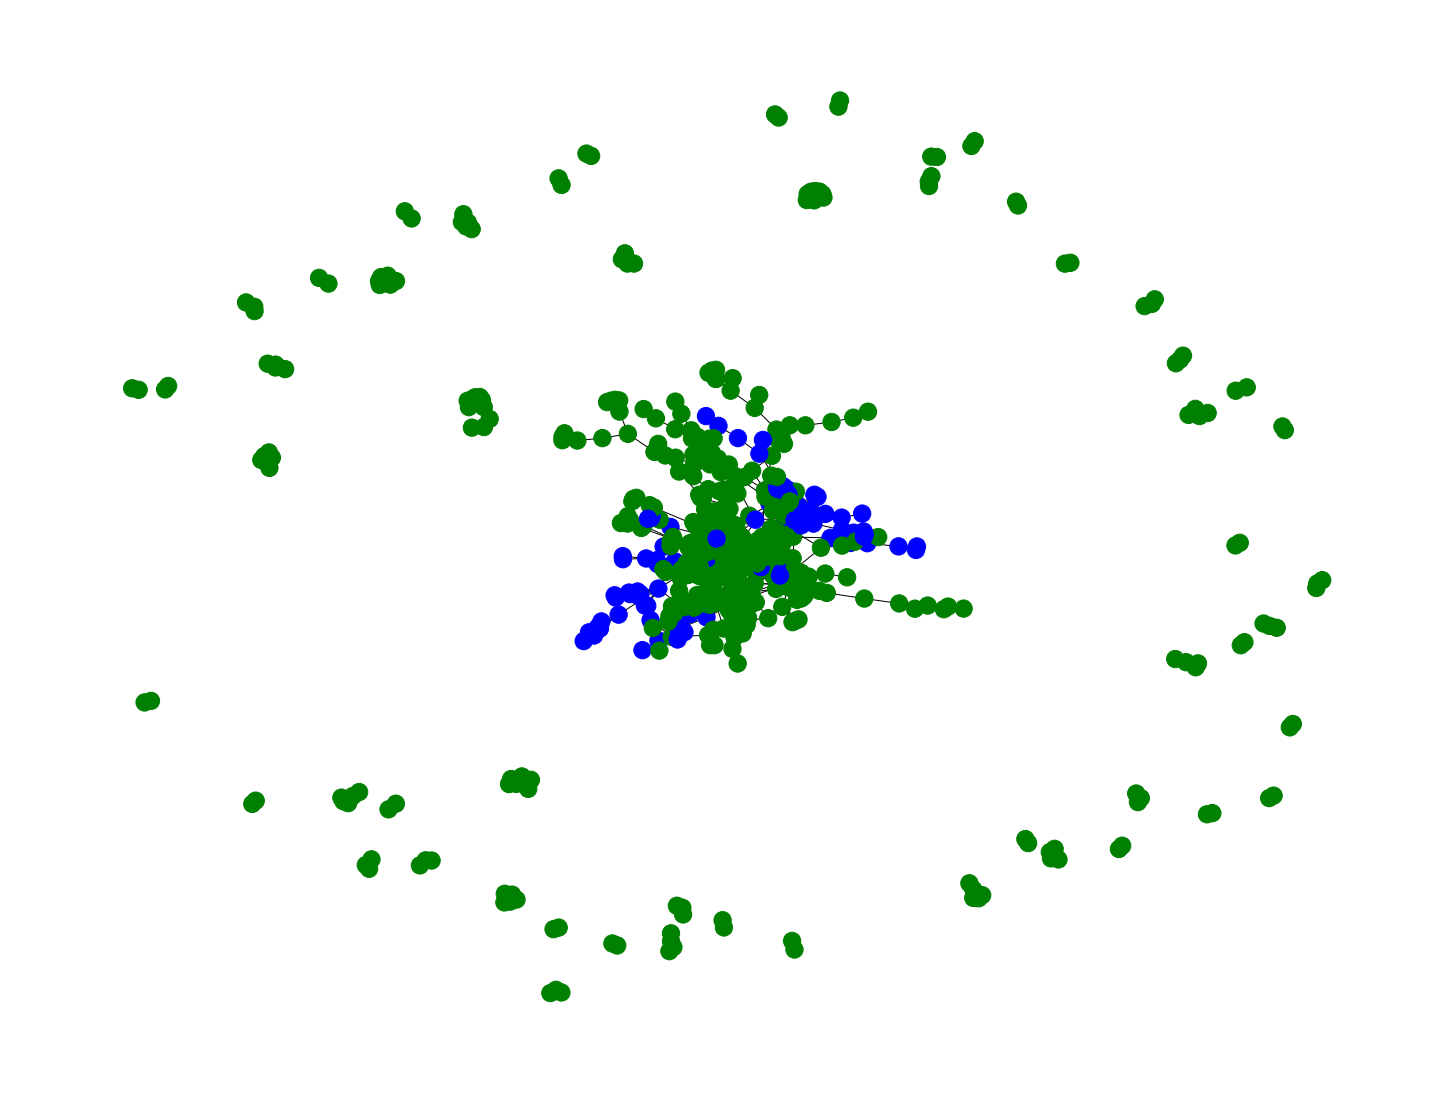

In [ ]:
# Q8 Plot the graph with different community. (1 MARK)
color_map = []
for node in G:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green') 
plt.figure(figsize=(20,15)) 
nx.draw(G, node_color=color_map, with_labels=False)
plt.show()

## Conclusion

Girvan-Newman algorithm is one of the first algorithms
that deals with detecting communities in networks. But is has some limitations, as it is iterative process so if the no of nodes are more(tens of thousand) then the algorithm should be avoided. 